In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [104]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [105]:
# UofT brand palette helpers
UOFT_PRIMARY = "#1E3765"
UOFT_SECONDARY_PALETTE = [
    "#007FA3", "#DC4633", "#6D247A", "#6FC7EA",
    "#00A189", "#AB1368", "#0D534D", "#F1C500", "#8DBF2E"
 ]

def build_palette(length: int):
    palette = [UOFT_PRIMARY] + UOFT_SECONDARY_PALETTE
    return palette[:length]

In [106]:
UOFT_PRIMARY = "#1E3765"


In [107]:
UOFT_SECONDARY_PALETTE = [
    "#007FA3", "#DC4633", "#6D247A", "#6FC7EA",
    "#00A189", "#AB1368", "#0D534D", "#F1C500", "#8DBF2E"
]


In [108]:
def build_palette(length: int):
    palette = [UOFT_PRIMARY] + UOFT_SECONDARY_PALETTE
    return palette[:length]


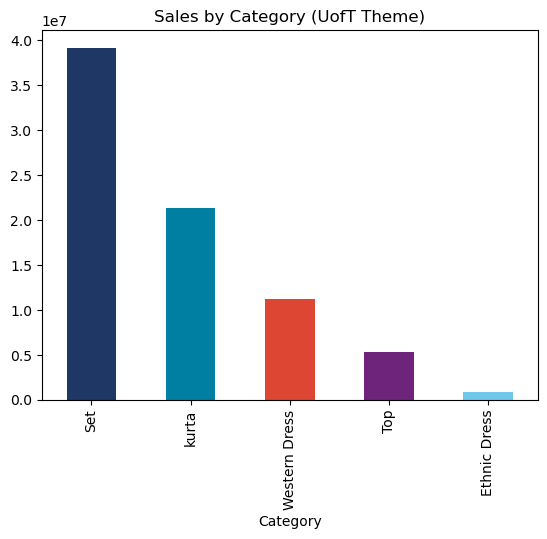

In [109]:
palette = build_palette(5)

sales_by_category.head(5).plot(
    kind="bar",
    color=palette
)
plt.title("Sales by Category (UofT Theme)")
plt.show()


In [110]:
# Step 1: Compute order status counts
status_counts = df["Status"].value_counts()
print(status_counts)


Status
shipped                          77596
shipped - delivered to buyer     28761
cancelled                        10766
shipped - returned to seller      1950
shipped - picked up                973
pending                            656
pending - waiting for pick up      281
shipped - returning to seller      145
shipped - out for delivery          35
shipped - rejected by buyer         11
shipped - lost in transit            5
shipped - damaged                    1
Name: count, dtype: int64


In [111]:
# Step 2: Build palette using your helper function
colors = build_palette(len(status_counts))
colors


['#1E3765',
 '#007FA3',
 '#DC4633',
 '#6D247A',
 '#6FC7EA',
 '#00A189',
 '#AB1368',
 '#0D534D',
 '#F1C500',
 '#8DBF2E']

In [113]:
from pathlib import Path

project_root = Path.cwd()
candidates = [
    project_root / "data" / "raw" / "Amazon Sale Report.csv",
    project_root.parent / "data" / "raw" / "Amazon Sale Report.csv"
]
for candidate in candidates:
    if candidate.exists():
        data_path = candidate
        break
else:
    raise FileNotFoundError("Couldn't locate 'data/raw/Amazon Sale Report.csv' from current working directory.")

df = pd.read_csv(data_path)


C:\Users\chait\AppData\Local\Temp\ipykernel_12624\180506935.py:15: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [114]:
# View first 5 rows
df.head()

# See number of rows, columns, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [115]:
df = df.drop(columns=['index', 'Unnamed: 22'])


In [116]:
df['Courier Status'] = df['Courier Status'].fillna('Unknown')
df = df.dropna(subset=['Amount'])


In [117]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['ship-postal-code'] = df['ship-postal-code'].astype('Int64')


C:\Users\chait\AppData\Local\Temp\ipykernel_12624\401103026.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [118]:
df['Category'] = df['Category'].str.strip().str.lower()


In [119]:
df['Status'] = df['Status'].replace({
    'Shipped - Delivered to Buyer': 'Shipped',
    'Pending - Waiting for Pickup': 'Pending'
})


In [120]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [121]:
# Read your CSV file into a DataFrame called df
df = pd.read_csv(data_path, low_memory=False)

# Check if loaded correctly
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [122]:
# BASIC CLEANING
for col in ["index", "Unnamed: 22"]:
    if col in df.columns:
        df = df.drop(columns=[col])


In [123]:
# 2) BASIC CLEANING (light & safe)
# Drop obvious junk columns if present
for col in ["index", "Unnamed: 22"]:
    if col in df.columns:
        df = df.drop(columns=[col])


In [124]:

# Standardize column names (trim spaces)
df.columns = [c.strip() for c in df.columns]

In [125]:
# Parse date
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

C:\Users\chait\AppData\Local\Temp\ipykernel_12624\2563824390.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [126]:
# Postal code to integer-like (if exists)
if "ship-postal-code" in df.columns:
    # keep missing as <NA>
    df["ship-postal-code"] = pd.to_numeric(df["ship-postal-code"], errors="coerce").astype("Int64")

In [127]:
# Ensure Amount is numeric
if "Amount" in df.columns:
    df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

In [128]:
# Drop rows without Amount (we need it for sales)
if "Amount" in df.columns:
    df = df.dropna(subset=["Amount"])

In [129]:
# Fill a few common text columns to avoid blanks in grouping
for col in ["Status", "Fulfilment", "Category", "ship-city", "ship-state", "currency", "fulfilled-by"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan})
        df[col] = df[col].fillna("Unknown")

In [130]:
# 3) DERIVED TIME FEATURES
if "Date" in df.columns:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Year-Month"] = df["Date"].dt.to_period("M").astype(str)

In [131]:
# 4) PICK METRIC FOR “PROFIT” (fallback to Amount if Profit doesn’t exist)
value_col = "Profit" if "Profit" in df.columns else "Amount"
metric_name = "Profit" if "Profit" in df.columns else "Sales (Amount)"

print(f"Using '{value_col}' as the main value metric ({metric_name}).")


Using 'Amount' as the main value metric (Sales (Amount)).


In [132]:
# ---------------------------------------------------------
# A) SALES BY CATEGORY, CITY, FULFILLMENT
# ---------------------------------------------------------
def top_n(grouped_series, n=10):
    """Return top N rows of a grouped sum Series (desc)."""
    s = grouped_series.sort_values(ascending=False)
    return s.head(n)


Top Categories by Sales (Amount)
Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64


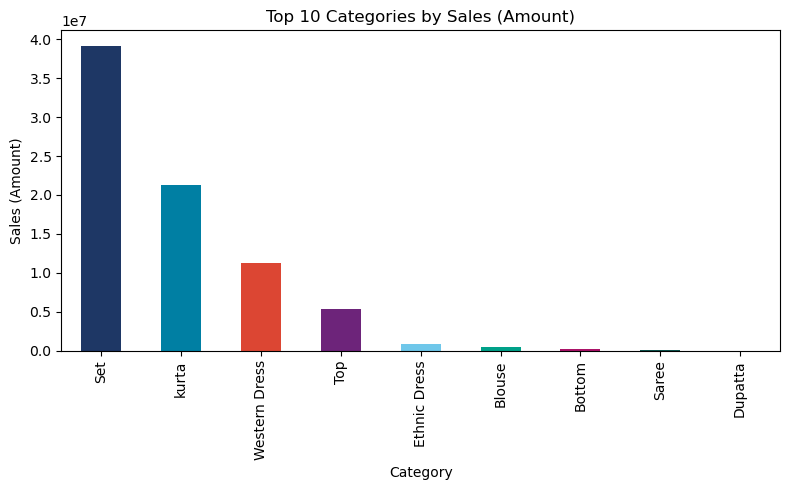

In [133]:
# 1) Category
if "Category" in df.columns:
    sales_by_cat = df.groupby("Category")[value_col].sum().sort_values(ascending=False)
    print("\nTop Categories by", metric_name)
    print(top_n(sales_by_cat, 10))
    
    # Plot
    plt.figure(figsize=(8, 5))
    sales_by_cat.head(10).plot(
        kind="bar",
        color=build_palette(len(sales_by_cat.head(10)))
    )
    plt.title(f"Top 10 Categories by {metric_name}")
    plt.xlabel("Category")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Top Cities by Sales (Amount)
ship-city
BENGALURU    6849664.99
HYDERABAD    4946032.82
MUMBAI       3704461.80
NEW DELHI    3613874.78
CHENNAI      3098745.74
PUNE         2338518.18
KOLKATA      1414978.87
GURUGRAM     1221618.74
THANE        1004355.29
LUCKNOW       933926.34
Name: Amount, dtype: float64


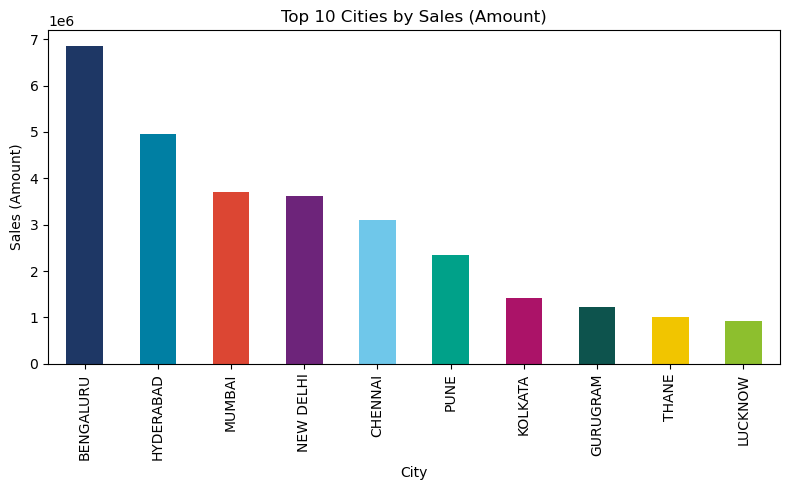

In [134]:
if "ship-city" in df.columns:
    sales_by_city = df.groupby("ship-city")[value_col].sum().sort_values(ascending=False)
    print("\nTop Cities by", metric_name)
    print(top_n(sales_by_city, 10))
    
    plt.figure(figsize=(8, 5))
    sales_by_city.head(10).plot(
        kind="bar",
        color=build_palette(len(sales_by_city.head(10)))
    )
    plt.title(f"Top 10 Cities by {metric_name}")
    plt.xlabel("City")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Sales (Amount) by Fulfilment
Fulfilment
Amazon      54322151.0
Merchant    24270527.3
Name: Amount, dtype: float64


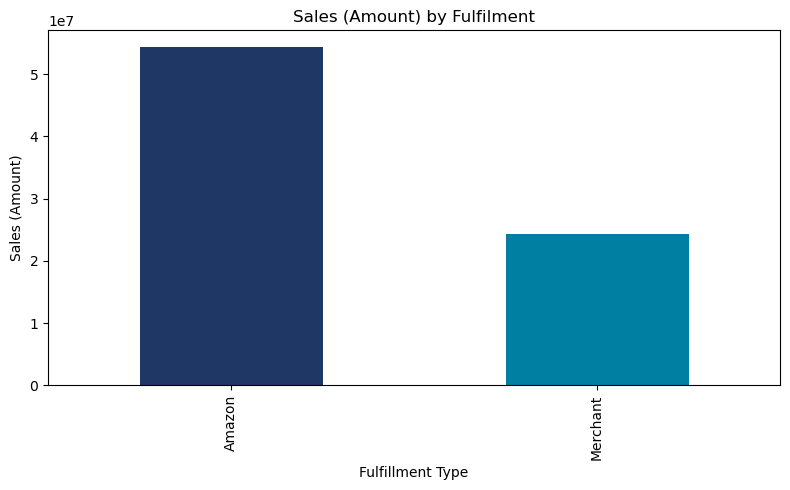

In [135]:
# 3) Fulfillment (Amazon vs Merchant, etc.)
# Use 'Fulfilment' if present; otherwise try 'fulfilled-by'
ful_col = "Fulfilment" if "Fulfilment" in df.columns else ("fulfilled-by" if "fulfilled-by" in df.columns else None)
if ful_col is not None:
    sales_by_ful = df.groupby(ful_col)[value_col].sum().sort_values(ascending=False)
    print(f"\n{metric_name} by {ful_col}")
    print(sales_by_ful)
    
    plt.figure(figsize=(8, 5))
    sales_by_ful.plot(
        kind="bar",
        color=build_palette(len(sales_by_ful))
    )
    plt.title(f"{metric_name} by {ful_col}")
    plt.xlabel("Fulfillment Type")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Sales (Amount) by Order Status
Status
Shipped                          50324255.0
Shipped - Delivered to Buyer     18650815.0
Cancelled                         6919284.3
Shipped - Returned to Seller      1269644.0
Shipped - Picked Up                661252.0
Pending                            430271.0
Pending - Waiting for Pick Up      192138.0
Shipped - Returning to Seller      107620.0
Shipped - Out for Delivery          26971.0
Shipped - Rejected by Buyer          7295.0
Shipped - Lost in Transit            1997.0
Shipped - Damaged                    1136.0
Name: Amount, dtype: float64


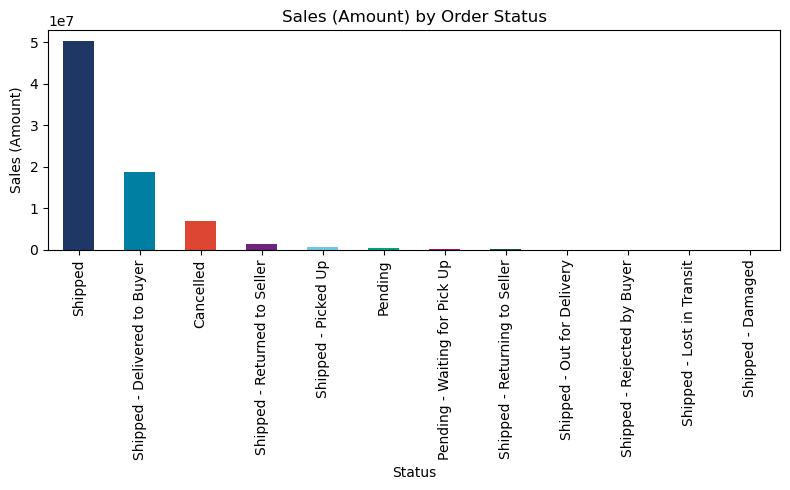

In [136]:
# ---------------------------------------------------------
# B) STATUS VS PROFIT/SALES TRENDS
# ---------------------------------------------------------
if "Status" in df.columns:
    status_metric = df.groupby("Status")[value_col].sum().sort_values(ascending=False)
    print(f"\n{metric_name} by Order Status")
    print(status_metric)
    
    plt.figure(figsize=(8, 5))
    status_metric.plot(
        kind="bar",
        color=build_palette(len(status_metric))
    )
    plt.title(f"{metric_name} by Order Status")
    plt.xlabel("Status")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Monthly Sales (Amount) Trend (sorted by time):
Year-Month
2022-03      101683.85
2022-06    23425809.38
2022-05    26226476.75
2022-04    28838708.32
Name: Amount, dtype: float64


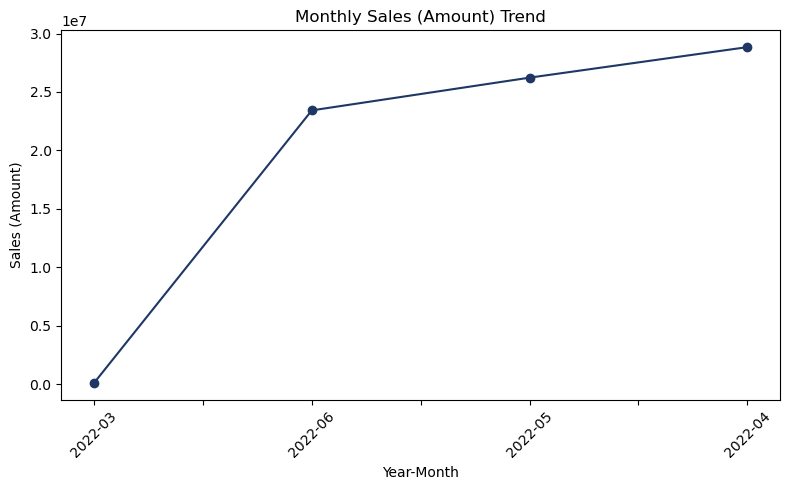

In [137]:
# ---------------------------------------------------------
# C) SEASONAL (MONTHLY) PATTERNS
# ---------------------------------------------------------
if "Year-Month" in df.columns:
    monthly = df.groupby("Year-Month")[value_col].sum().sort_values()
    print(f"\nMonthly {metric_name} Trend (sorted by time):")
    print(monthly.tail(12))  # show the most recent 12 months if you have many
    
    plt.figure(figsize=(8, 5))
    monthly.plot(
        kind="line",
        marker="o",
        color=UOFT_PRIMARY
    )
    plt.title(f"Monthly {metric_name} Trend")
    plt.xlabel("Year-Month")
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [138]:
# ---------------------------------------------------------
# D) QUICK PRINT: BASIC COUNTS (OPTIONAL)
# ---------------------------------------------------------
print("\nBasic counts:")
for col in ["Status", "Category", ful_col]:
    if col is not None and col in df.columns:
        print(f"- Unique {col}: {df[col].nunique()}")


Basic counts:
- Unique Status: 12
- Unique Category: 9
- Unique Fulfilment: 2


In [139]:
# ---------------------------------------------------------
# EDA with CSV Export & Plot Saving
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create a folder to save outputs
os.makedirs("outputs", exist_ok=True)

# 1) LOAD
df = pd.read_csv(data_path, low_memory=False)

# 2) BASIC CLEANING
for col in ["index", "Unnamed: 22"]:
    if col in df.columns:
        df = df.drop(columns=[col])

df.columns = [c.strip() for c in df.columns]
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df = df.dropna(subset=["Amount"])

# Fill missing text values
for col in ["Status", "Fulfilment", "Category", "ship-city", "ship-state", "currency", "fulfilled-by"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan})
        df[col] = df[col].fillna("Unknown")

# Add time features
df["Year-Month"] = df["Date"].dt.to_period("M").astype(str)

# Pick main value metric
value_col = "Profit" if "Profit" in df.columns else "Amount"
metric_name = "Profit" if "Profit" in df.columns else "Sales (Amount)"
print(f"Using '{value_col}' as metric for analysis.\n")

# ---------------------------------------------------------
# Helper to export & plot
def save_results(df_grouped, name, kind="bar", title=None, xlabel=None, ylabel=None):
    csv_path = f"outputs/{name}.csv"
    png_path = f"outputs/{name}.png"
    df_grouped.to_csv(csv_path)
    print(f"✅ Saved: {csv_path}")

    plt.figure(figsize=(8, 5))
    if kind == "line":
        subset = df_grouped.sort_index()
        subset.plot(kind=kind, marker="o", color=UOFT_PRIMARY)
    else:
        subset = df_grouped.head(10)
        subset.plot(kind=kind, color=build_palette(len(subset)))
    plt.title(title or name)
    plt.xlabel(xlabel or "")
    plt.ylabel(ylabel or metric_name)
    plt.tight_layout()
    plt.savefig(png_path)
    plt.close()
    print(f"📊 Plot saved: {png_path}\n")

# ---------------------------------------------------------
# A) SALES BY CATEGORY
if "Category" in df.columns:
    sales_by_cat = df.groupby("Category")[value_col].sum().sort_values(ascending=False)
    save_results(
        sales_by_cat,
        "sales_by_category",
        title=f"Top 10 Categories by {metric_name}",
        xlabel="Category",
        ylabel=metric_name
    )

# B) SALES BY CITY
if "ship-city" in df.columns:
    sales_by_city = df.groupby("ship-city")[value_col].sum().sort_values(ascending=False)
    save_results(
        sales_by_city,
        "sales_by_city",
        title=f"Top 10 Cities by {metric_name}",
        xlabel="City",
        ylabel=metric_name
    )

# C) SALES BY FULFILLMENT TYPE
ful_col = "Fulfilment" if "Fulfilment" in df.columns else "fulfilled-by" if "fulfilled-by" in df.columns else None
if ful_col:
    sales_by_ful = df.groupby(ful_col)[value_col].sum().sort_values(ascending=False)
    save_results(
        sales_by_ful,
        "sales_by_fulfillment",
        title=f"{metric_name} by {ful_col}",
        xlabel="Fulfillment Type",
        ylabel=metric_name
    )

# D) STATUS VS SALES
if "Status" in df.columns:
    status_metric = df.groupby("Status")[value_col].sum().sort_values(ascending=False)
    save_results(
        status_metric,
        "status_vs_sales",
        title=f"{metric_name} by Order Status",
        xlabel="Order Status",
        ylabel=metric_name
    )

# E) MONTHLY TREND
if "Year-Month" in df.columns:
    monthly = df.groupby("Year-Month")[value_col].sum().sort_values()
    save_results(
        monthly,
        "monthly_sales_trend",
        kind="line",
        title=f"Monthly {metric_name} Trend",
        xlabel="Year-Month",
        ylabel=metric_name
    )

print("🎉 All summary CSVs and charts saved in the 'outputs' folder.")

C:\Users\chait\AppData\Local\Temp\ipykernel_12624\3930820108.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


Using 'Amount' as metric for analysis.

✅ Saved: outputs/sales_by_category.csv
📊 Plot saved: outputs/sales_by_category.png

✅ Saved: outputs/sales_by_city.csv
📊 Plot saved: outputs/sales_by_city.png

✅ Saved: outputs/sales_by_fulfillment.csv
📊 Plot saved: outputs/sales_by_fulfillment.png

✅ Saved: outputs/status_vs_sales.csv
📊 Plot saved: outputs/status_vs_sales.png

✅ Saved: outputs/monthly_sales_trend.csv
📊 Plot saved: outputs/monthly_sales_trend.png

🎉 All summary CSVs and charts saved in the 'outputs' folder.


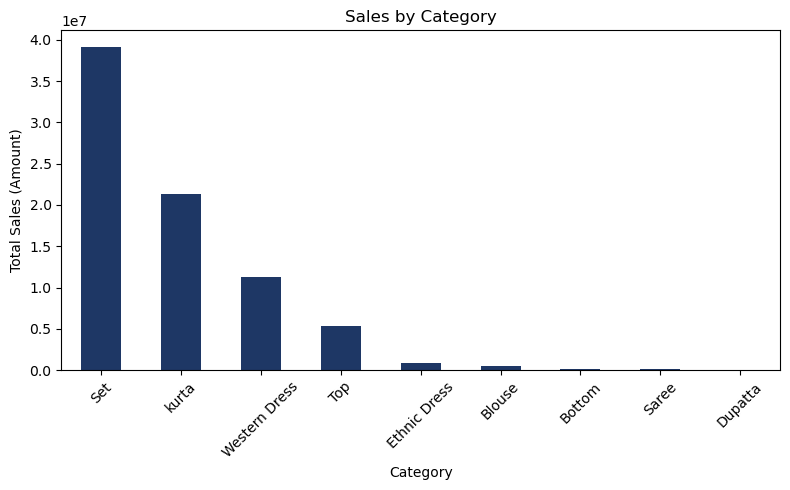

In [140]:
import matplotlib.pyplot as plt

# Group and sum sales by category
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar', color=UOFT_PRIMARY)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


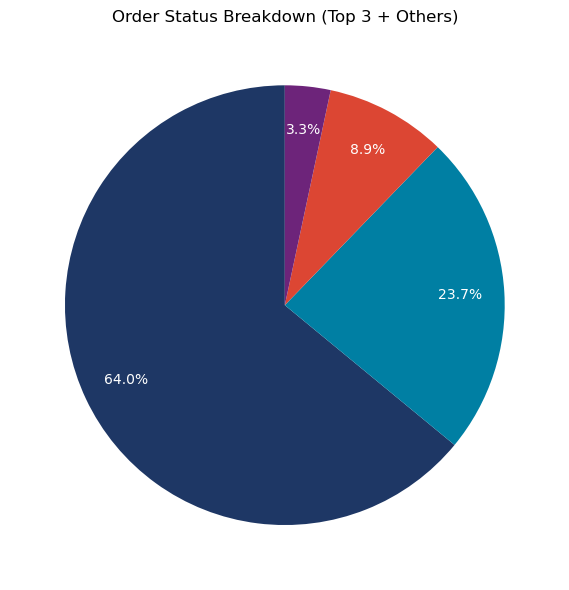

In [141]:
# Count number of orders per status
order_status_counts = df['Status'].value_counts()

if len(order_status_counts) > 3:
    top3 = order_status_counts.nlargest(3)
    others_sum = order_status_counts.iloc[3:].sum()
    clean_counts = pd.concat([top3, pd.Series({'Others': others_sum})])
else:
    clean_counts = order_status_counts

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=build_palette(len(clean_counts)),
    pctdistance=0.8,
    labeldistance=1.05
 )
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Order Status Breakdown (Top 3 + Others)')
plt.ylabel('')  # Hides the y-axis label
plt.tight_layout()
plt.show()


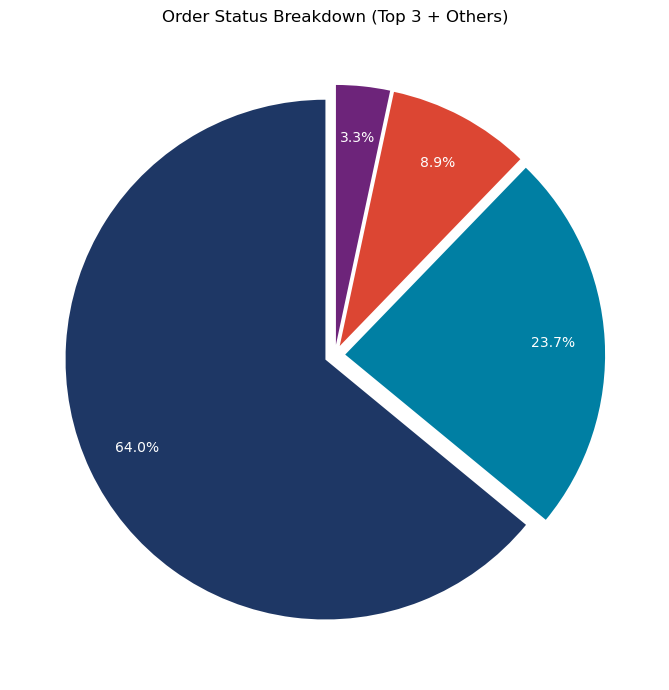

In [142]:
import matplotlib.pyplot as plt

# Count statuses
counts = df['Status'].value_counts()

if len(counts) > 3:
    top3 = counts.nlargest(3)
    others_sum = counts.iloc[3:].sum()
    clean_counts = pd.concat([top3, pd.Series({'Others': others_sum})])
else:
    clean_counts = counts

explode = [0.04] * len(clean_counts)

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=build_palette(len(clean_counts)),
    pctdistance=0.8,
    labeldistance=1.1,
    explode=explode,
    textprops={'fontsize': 10}
)
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Order Status Breakdown (Top 3 + Others)")
plt.ylabel('')
plt.tight_layout()

plt.savefig("outputs/order_status_breakdown_clean.png")
plt.show()


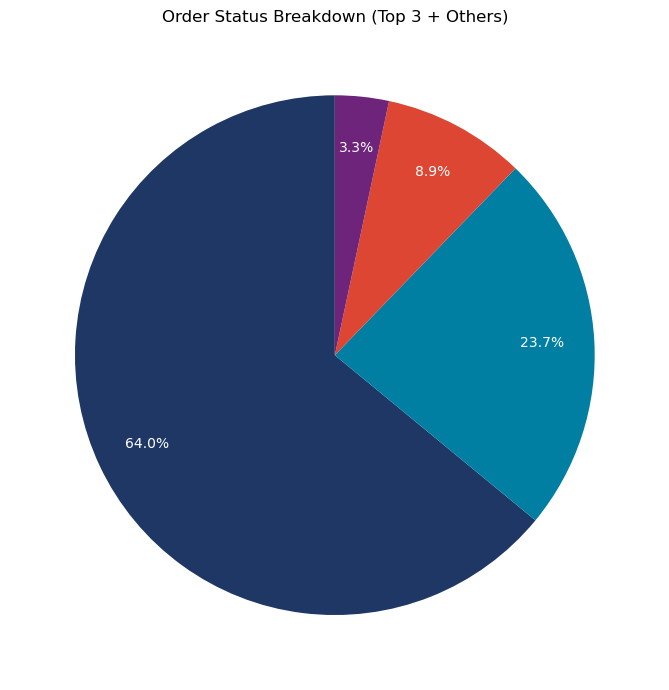

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

counts = df['Status'].value_counts()

if len(counts) > 3:
    top3 = counts.nlargest(3)
    others_sum = counts.iloc[3:].sum()
    clean_counts = pd.concat([top3, pd.Series({'Others': others_sum})])
else:
    clean_counts = counts

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=build_palette(len(clean_counts)),
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 10}
)
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Order Status Breakdown (Top 3 + Others)")
plt.ylabel('')
plt.tight_layout()
plt.show()


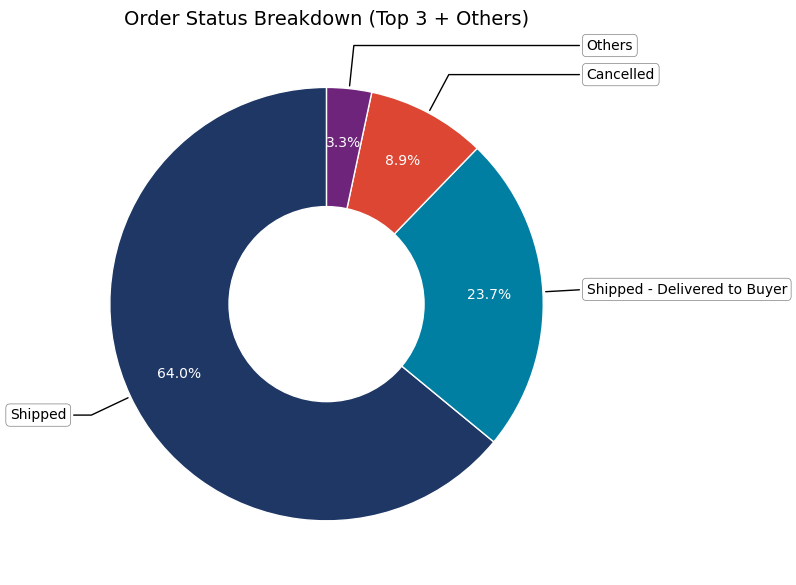

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ----- Prepare Data -----
counts = df['Status'].value_counts()

if len(counts) > 3:
    top3 = counts.nlargest(3)
    others_sum = counts.iloc[3:].sum()
    clean_counts = pd.concat([top3, pd.Series({'Others': others_sum})])
else:
    clean_counts = counts

colors = build_palette(len(clean_counts))

# ----- Plot Donut Chart -----
fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
for autotext in autotexts:
    autotext.set_color('white')

# Add donut hole
centre = plt.Circle((0,0), 0.45, color='white', fc='white')
fig.gca().add_artist(centre)

# Labels outside with connector lines for top slices and optional Others
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=10, va="center")

for label, wedge in zip(clean_counts.index, wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    
    ha = "left" if x > 0 else "right"
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(
        label,
        xy=(x, y),
        xytext=(1.2 * np.sign(x), 1.2 * y),
        ha=ha,
        **kw
    )

# Title
plt.title("Order Status Breakdown (Top 3 + Others)", fontsize=14)

plt.tight_layout()
plt.show()


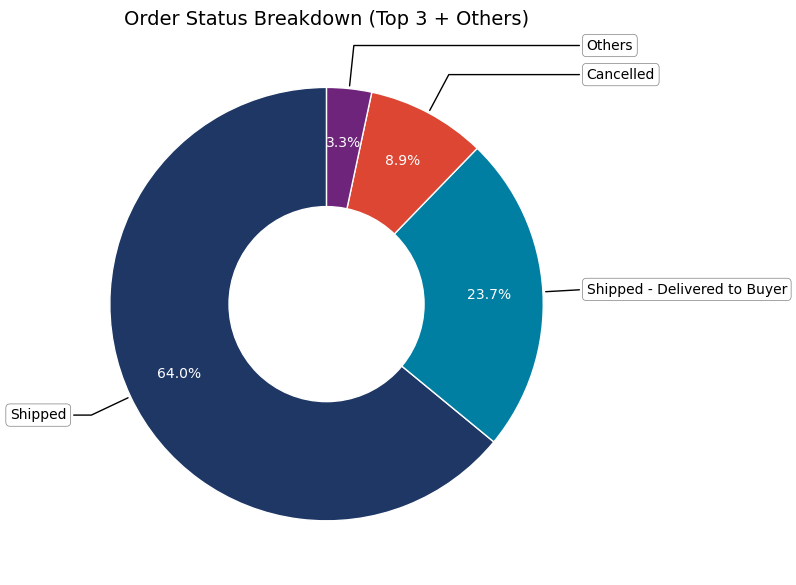

In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# ----- Prepare Data -----
counts = df['Status'].value_counts()

if len(counts) > 3:
    top3 = counts.nlargest(3)
    others_sum = counts.iloc[3:].sum()
    clean_counts = pd.concat([top3, pd.Series({'Others': others_sum})])
else:
    clean_counts = counts

colors = build_palette(len(clean_counts))

# ----- Plot Donut Chart -----
fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
for autotext in autotexts:
    autotext.set_color('white')

# Donut hole
centre_circle = plt.Circle((0,0), 0.45, color='white')
fig.gca().add_artist(centre_circle)

# Labels Outside with Arrow Lines
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=10, va="center")

for label, wedge in zip(clean_counts.index, wedges):
    angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    
    ha = "left" if x > 0 else "right"
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(
        label,
        xy=(x, y),
        xytext=(1.2*np.sign(x), 1.2*y),
        ha=ha, **kw
)

plt.title("Order Status Breakdown (Top 3 + Others)", fontsize=14)
plt.tight_layout()
plt.show()


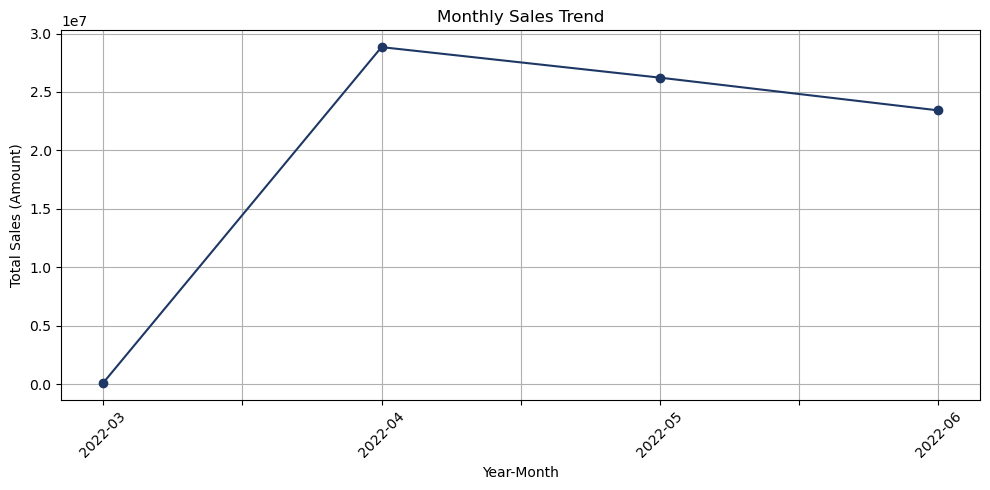

In [146]:
# Ensure date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month and year
df['Year-Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by month
monthly_sales = df.groupby('Year-Month')['Amount'].sum()

# Plot line chart
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color=UOFT_PRIMARY)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


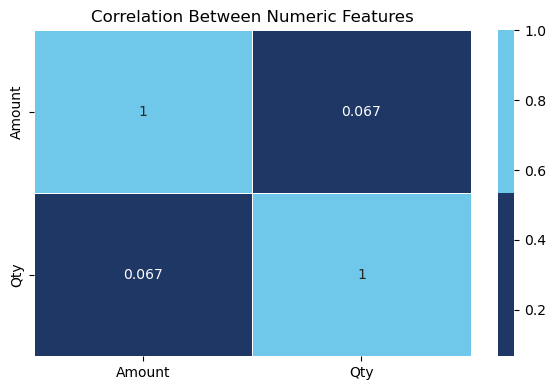

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick only numeric columns that exist in the dataset
numeric_cols = [c for c in ['Amount', 'Qty', 'Discount'] if c in df.columns]

if len(numeric_cols) >= 2:
    corr_data = df[numeric_cols].corr()
    brand_cmap = sns.color_palette([UOFT_PRIMARY, "#6FC7EA"], as_cmap=True)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_data, annot=True, cmap=brand_cmap, linewidths=0.5)
    plt.title('Correlation Between Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns found for a correlation heatmap.")


In [148]:
import numpy as np

# Fill missing text fields with "Unknown"
for col in ["Courier Status", "ship-city", "ship-state", "ship-country", "fulfilled-by"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Drop rows where Amount is missing (essential for analysis)
if "Amount" in df.columns:
    df = df.dropna(subset=["Amount"])

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Create new columns for month and year
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Clean up postal code (make it integer)
if "ship-postal-code" in df.columns:
    df["ship-postal-code"] = pd.to_numeric(df["ship-postal-code"], errors="coerce").astype("Int64")

# Clean category and state names for consistency
for col in ["Category", "ship-state", "Status"]:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

# Replace empty text with "unknown"
df = df.replace("", "Unknown")

print("✅ Data cleaning complete!")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])


✅ Data cleaning complete!
Rows: 121180 | Columns: 25


In [149]:
df.info()
df.describe()
df['Category'].value_counts().head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121180 non-null  object        
 1   Date                121180 non-null  datetime64[ns]
 2   Status              121180 non-null  object        
 3   Fulfilment          121180 non-null  object        
 4   Sales Channel       121180 non-null  object        
 5   ship-service-level  121180 non-null  object        
 6   Style               121180 non-null  object        
 7   SKU                 121180 non-null  object        
 8   Category            121180 non-null  object        
 9   Size                121180 non-null  object        
 10  ASIN                121180 non-null  object        
 11  Courier Status      121180 non-null  object        
 12  Qty                 121180 non-null  int64         
 13  currency            121180 non-nul

Category
set              47042
kurta            46717
western dress    14704
top              10165
ethnic dress      1093
blouse             881
bottom             420
saree              155
dupatta              3
Name: count, dtype: int64

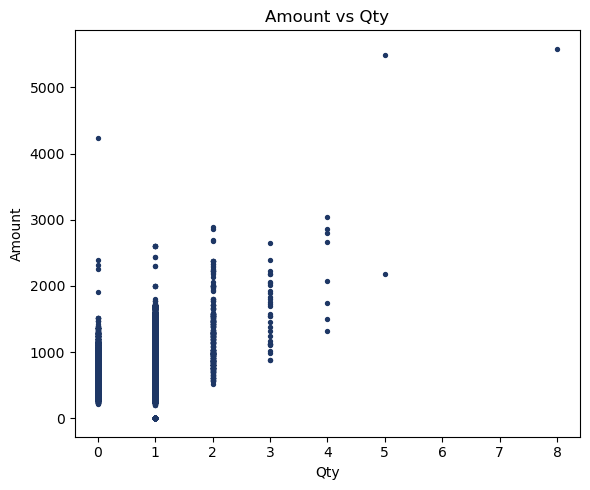

In [151]:
plt.figure(figsize=(6,5))
plt.scatter(df["Qty"], df["Amount"], s=8, color=UOFT_PRIMARY)
plt.title("Amount vs Qty")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.tight_layout()
plt.savefig("outputs/scatter_amount_qty.png")
plt.show()


I have updated UofT BRAND Color PALETTE to all the charts

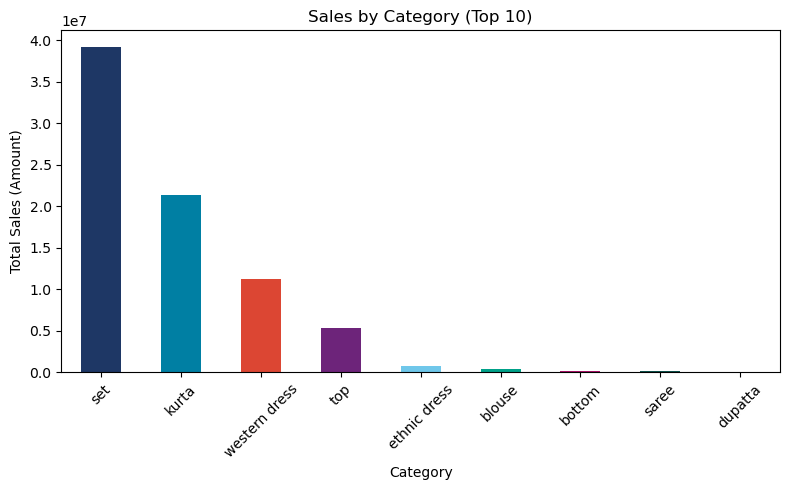

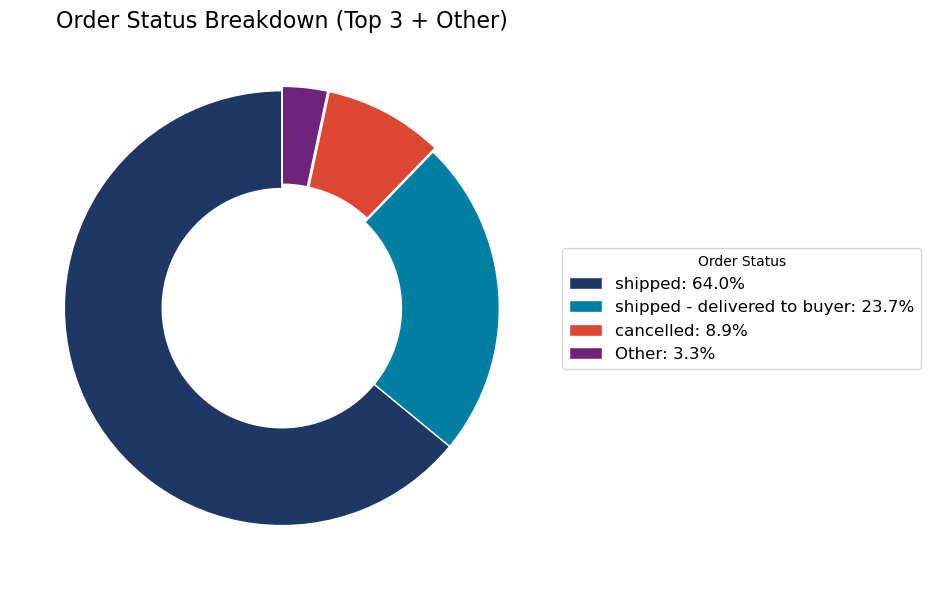

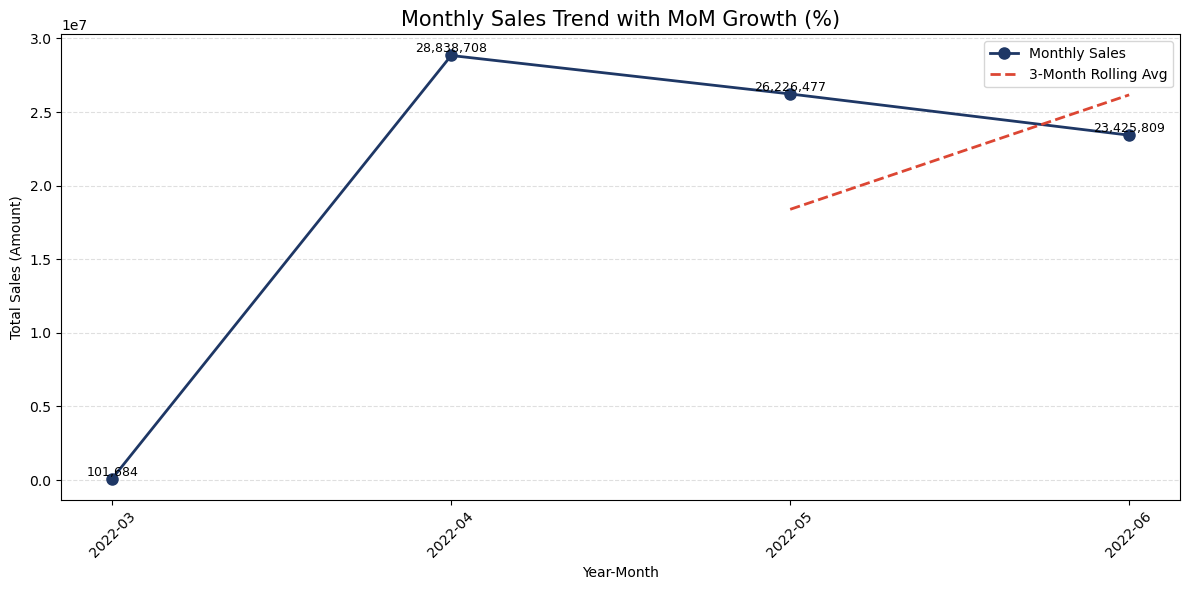

Year-Month
2022-03         NaN
2022-04    28261.15
2022-05       -9.06
2022-06      -10.68
Name: Amount, dtype: float64

Numeric columns used for correlation: ['Amount', 'Qty']


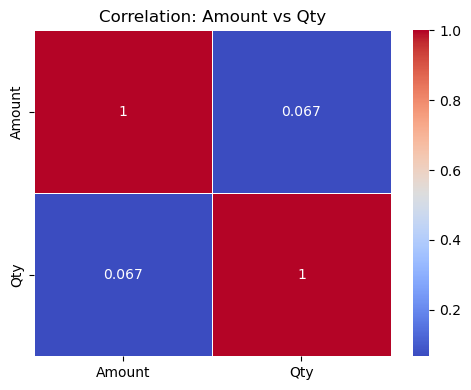

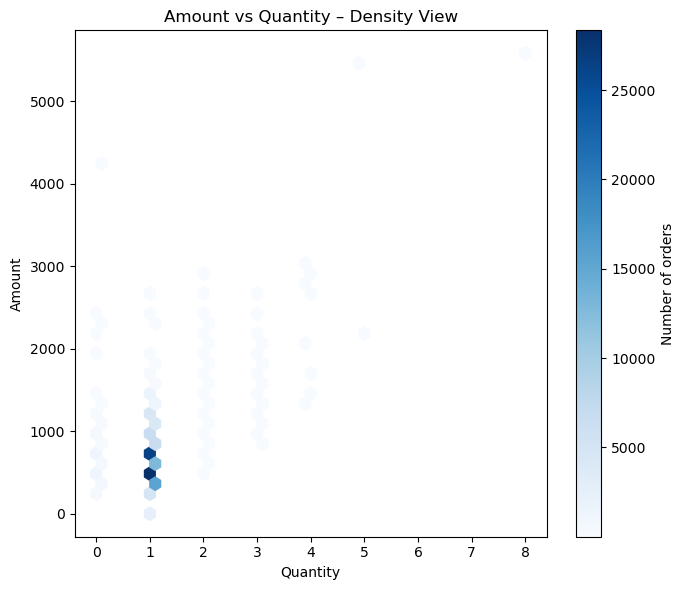

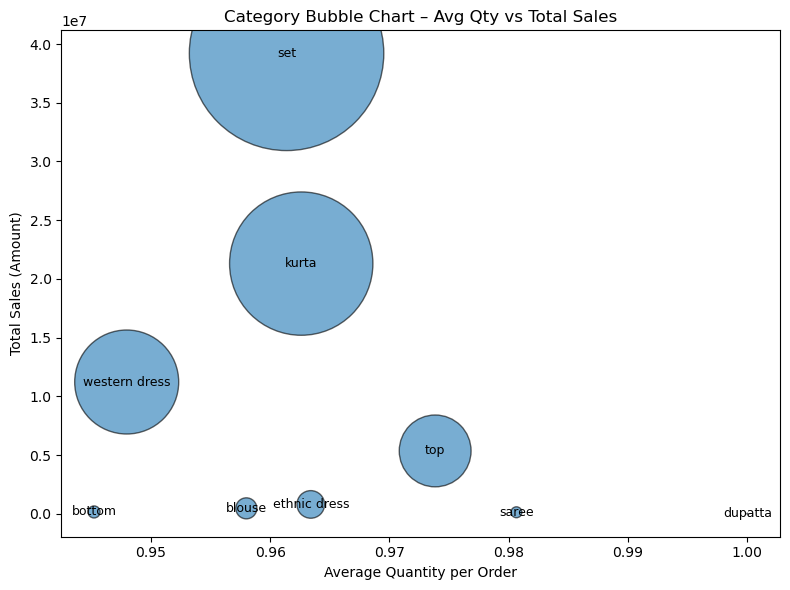

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----------------------------------------
# 0. UofT BRAND PALETTE
# ----------------------------------------
UOFT_PRIMARY = "#1E3765"
UOFT_SECONDARY_PALETTE = [
    "#007FA3", "#DC4633", "#6D247A", "#6FC7EA",
    "#00A189", "#AB1368", "#0D534D", "#F1C500", "#8DBF2E"
]

def build_palette(length: int):
    palette = [UOFT_PRIMARY] + UOFT_SECONDARY_PALETTE
    return palette[:length]

# ----------------------------------------
# 1. PREP: DATE + MONTHLY COLUMN
# ----------------------------------------
# Make sure Date is datetime
try:
    df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y", errors="coerce")
except:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Create Year-Month if not already there
if "Year-Month" not in df.columns:
    df["Year-Month"] = df["Date"].dt.to_period("M").astype(str)

# ----------------------------------------
# 2. BAR CHART – SALES BY CATEGORY (UofT COLORS)
# ----------------------------------------
sales_by_category = (
    df.groupby("Category")["Amount"]
      .sum()
      .sort_values(ascending=False)
)

top_n = 10  # change if you want more/less
top_cat = sales_by_category.head(top_n)
cat_colors = build_palette(len(top_cat))

plt.figure(figsize=(8, 5))
top_cat.plot(kind="bar", color=cat_colors)
plt.title("Sales by Category (Top 10)")
plt.xlabel("Category")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------------
# 3. PIE CHART – ORDER STATUS BREAKDOWN (UofT COLORS)
# ----------------------------------------
import matplotlib.pyplot as plt

# Prepare top 3 categories + Other
status_counts = df["Status"].value_counts()

top3 = status_counts.head(3)
other = status_counts.iloc[3:].sum()

labels = top3.index.tolist() + ["Other"]
sizes = top3.values.tolist() + [other]

# UofT colors
colors = build_palette(len(labels))

# Explode small slices slightly
explode = [0.02 if s < 0.10 * sum(sizes) else 0 for s in sizes]

# Create donut figure
fig, ax = plt.subplots(figsize=(10, 6))

wedges, _ = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    explode=explode,
    wedgeprops=dict(width=0.45, edgecolor='white')
)

# Title
plt.title("Order Status Breakdown (Top 3 + Other)", fontsize=16)

# -----------------------------------------
# Create a legend instead of external labels
# -----------------------------------------
legend_labels = [f"{lbl}: {sz/sum(sizes)*100:.1f}%" for lbl, sz in zip(labels, sizes)]
plt.legend(
    wedges,
    legend_labels,
    title="Order Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12
)

plt.tight_layout()
plt.show()


# ----------------------------------------
# ----------------------------------------
# 4. LINE CHART – ENHANCED MONTHLY SALES TREND
# ----------------------------------------

# Calculate monthly sales
monthly_sales = (
    df.groupby("Year-Month")["Amount"]
      .sum()
      .sort_index()
)

# Calculate Month-over-Month growth %
monthly_mom = monthly_sales.pct_change() * 100

plt.figure(figsize=(12, 6))

# Plot the sales trend
plt.plot(
    monthly_sales.index,
    monthly_sales.values,
    marker="o",
    color=UOFT_PRIMARY,
    linewidth=2,
    markersize=8,
    label="Monthly Sales"
)

# ---------------------------------------------------
# Optional: Add smoothed rolling trendline (3-month)
# ---------------------------------------------------
if len(monthly_sales) >= 3:
    rolling_avg = monthly_sales.rolling(3).mean()
    plt.plot(
        monthly_sales.index,
        rolling_avg,
        color="#DC4633",        # UofT red accent
        linewidth=2,
        linestyle="--",
        label="3-Month Rolling Avg"
    )

# Add data labels (amount)
for i, value in enumerate(monthly_sales.values):
    plt.text(
        i,
        value,
        f"{value:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Title & labels
plt.title("Monthly Sales Trend with MoM Growth (%)", fontsize=15)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (Amount)")

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Show Month-over-Month change
display(monthly_mom.round(2))


# ----------------------------------------
# 5. HEATMAP – CORRELATION (AMOUNT vs QTY)
# ----------------------------------------
numeric_cols = [col for col in ["Amount", "Qty"] if col in df.columns]
print("Numeric columns used for correlation:", numeric_cols)

if len(numeric_cols) >= 2:
    corr_data = df[numeric_cols].corr()

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        corr_data,
        annot=True,
        cmap="coolwarm",  # diverging, good for ± relationships
        linewidths=0.5
    )
    plt.title("Correlation: Amount vs Qty")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a heatmap.")


#  Density Scatter (Hexbin) – Amount vs Qty

plt.figure(figsize=(7,6))

# Hexbin plot for density
hb = plt.hexbin(
    df["Qty"],
    df["Amount"],
    gridsize=40,
    cmap="Blues",   # can change to "viridis" or another colormap
    mincnt=1
)

plt.colorbar(hb, label="Number of orders")

plt.title("Amount vs Quantity – Density View")
plt.xlabel("Quantity")
plt.ylabel("Amount")
plt.tight_layout()
plt.savefig("outputs/hexbin_amount_qty.png", dpi=300)
plt.show()


# Group by Category
cat_group = (
    df.groupby("Category")
      .agg(
          total_amount=("Amount", "sum"),
          avg_qty=("Qty", "mean"),
          orders=("Order ID", "count")
      )
      .reset_index()
)

# Scale bubble sizes (tune the factor if too big/small)
size_factor = 0.0005
sizes = cat_group["total_amount"] * size_factor

plt.figure(figsize=(8,6))
plt.scatter(
    cat_group["avg_qty"],
    cat_group["total_amount"],
    s=sizes,
    alpha=0.6,
    edgecolors="black"
)

for _, row in cat_group.iterrows():
    plt.text(
        row["avg_qty"],
        row["total_amount"],
        row["Category"],
        fontsize=9,
        ha="center",
        va="center"
    )

plt.title("Category Bubble Chart – Avg Qty vs Total Sales")
plt.xlabel("Average Quantity per Order")
plt.ylabel("Total Sales (Amount)")
plt.tight_layout()
plt.savefig("outputs/bubble_category_amount_qty.png", dpi=300)
plt.show()
